You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [74]:
data = pd.read_csv('db/Countries-exercise.csv', index_col='name')  #index_col will use the given column as index for the dataFrame
data

,Longitude,Latitude
name,,
Aruba,-69.982677,12.520880
Afghanistan,66.004734,33.835231
Angola,17.537368,-12.293361
Anguilla,-63.064989,18.223959
Albania,20.049834,41.142450
...,...,...
Samoa,-172.164851,-13.753243
Yemen,47.586762,15.909280
South Africa,25.083901,-29.000341


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

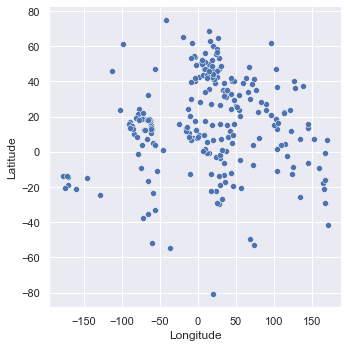

In [75]:
sns.set_theme()
sns.relplot(data=data,x='Longitude',y='Latitude')

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [76]:
x = data.copy()
x

,Longitude,Latitude
name,,
Aruba,-69.982677,12.520880
Afghanistan,66.004734,33.835231
Angola,17.537368,-12.293361
Anguilla,-63.064989,18.223959
Albania,20.049834,41.142450
...,...,...
Samoa,-172.164851,-13.753243
Yemen,47.586762,15.909280
South Africa,25.083901,-29.000341


## Clustering

    Finding the best number of clusters with the Elbow Method

In [77]:
wcss = []

# 241 is the number of rows on the data, but it is not necessary to consider that many clusters, the limit will be set to 20
# Range does not include the upper boundary
for i in range (1,21):  
     kmeans = KMeans(i)
     kmeans.fit(x)
     wcss_i = kmeans.inertia_ # function that calculates the wcss
     wcss.append(wcss_i)

wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055905,
 256573.086759343,
 192212.4818949704,
 152607.2138016121,
 127519.42818664196,
 102891.39703473673,
 84967.41720068287,
 76571.81780508836,
 70549.65935786514,
 65777.26201509709,
 60357.985200785275,
 54425.89057245084,
 50437.19641072132,
 47557.70284003642,
 43994.89823852546,
 41079.94454070399,
 39284.91591736569,
 36636.73377755189]

    Plotting the WCSS

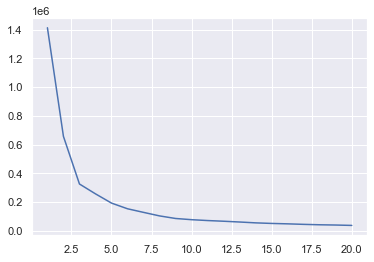

In [78]:
clusters_no = range(1,21)

graph = sns.lineplot(x=clusters_no, y=wcss)

Based on the above graph the optimal number could be 2 and 5, considering the limit of 20

In [79]:
kmeans = KMeans(5) 

In [80]:
kmeans.fit(x) #the fit method will apply the KMeans to the data contained in 'x'

KMeans(n_clusters=5)

### Clustering Resutls

In [81]:
results = kmeans.fit_predict(x)
results

array([1, 2, 2, 1, 3, 3, 3, 2, 1, 3, 4, 2, 0, 2, 1, 0, 3, 2, 2, 3, 3, 3,
       0, 3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 0, 0, 2, 2, 3, 1, 0, 3, 2,
       2, 2, 4, 1, 2, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 3, 2,
       3, 3, 2, 3, 0, 1, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 3, 1, 3, 0, 3, 2, 0, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3,
       0, 2, 2, 2, 2, 0, 1, 1, 0, 3, 2, 0, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3,
       0, 1, 3, 3, 3, 2, 2, 1, 0, 3, 3, 3, 0, 3, 0, 0, 2, 3, 1, 2, 2, 0,
       2, 0, 3, 0, 3, 1, 4, 3, 3, 2, 0, 0, 2, 2, 1, 4, 1, 0, 0, 0, 3, 1,
       0, 3, 1, 3, 4, 2, 3, 0, 2, 3, 2, 2, 2, 3, 0, 1, 3, 0, 3, 1, 3, 2,
       2, 1, 3, 2, 1, 3, 3, 3, 2, 1, 2, 3, 1, 3, 3, 0, 2, 2, 0, 4, 1, 3,
       3, 0, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 0, 0, 4, 4, 2, 2, 2, 2])

In [82]:
df_results = data.copy()
df_results['Clusters'] = results #addind colums with the results
df_results

,Longitude,Latitude,Clusters
name,,,
Aruba,-69.982677,12.520880,1
Afghanistan,66.004734,33.835231,2
Angola,17.537368,-12.293361,2
Anguilla,-63.064989,18.223959,1
Albania,20.049834,41.142450,3
...,...,...,...
Samoa,-172.164851,-13.753243,4
Yemen,47.586762,15.909280,2
South Africa,25.083901,-29.000341,2


Graphs

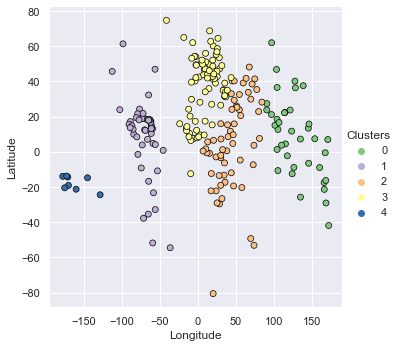

In [83]:
sns.relplot(data=df_results,x='Longitude',y='Latitude',
            hue='Clusters',
            palette='Accent', edgecolor='black',linewidth=0.7) #visuals